Random Forest


Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Importing Dataset

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 3 : Feature Selection & Engineering

In [7]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

#Missing Values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

#Categorical features
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2})

Step 4: Split the data

In [8]:
X = data[features]
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)

Step 5: Feature Scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Step 6: Train the data

In [10]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)
rf.fit(X_train_scaled,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Step 7: Predict the data

In [11]:
y_pred = rf.predict(X_test_scaled)

Step 8: Evaluation

In [12]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.7541899441340782

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       105
           1       0.84      0.50      0.63        74

    accuracy                           0.75       179
   macro avg       0.78      0.72      0.72       179
weighted avg       0.77      0.75      0.74       179



Step 9: Confusion Matrix

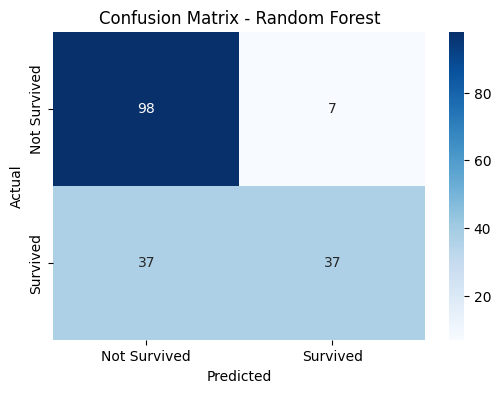

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Step 10: Feature Importance

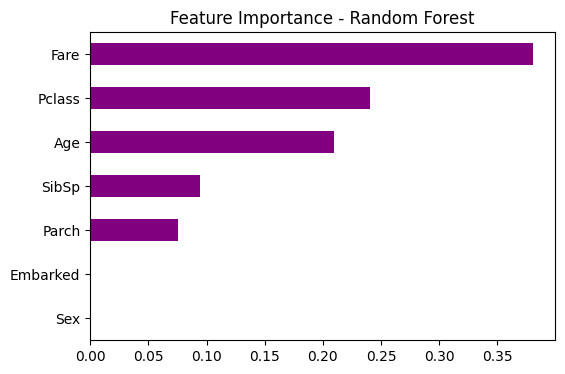

In [16]:
importances = pd.Series(rf.feature_importances_,index = features).sort_values(ascending=True)
importances.plot(kind='barh', color='purple',figsize=(6,4))
plt.title("Feature Importance - Random Forest")
plt.show()